In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data = pd.read_csv('/Users/macbookpro/Documents/Data Science /regression/Decision tree/AmesHousing.csv')


In [137]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percentage = (missing_data / len(data)) * 100
desc = data.describe()
print(desc)

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

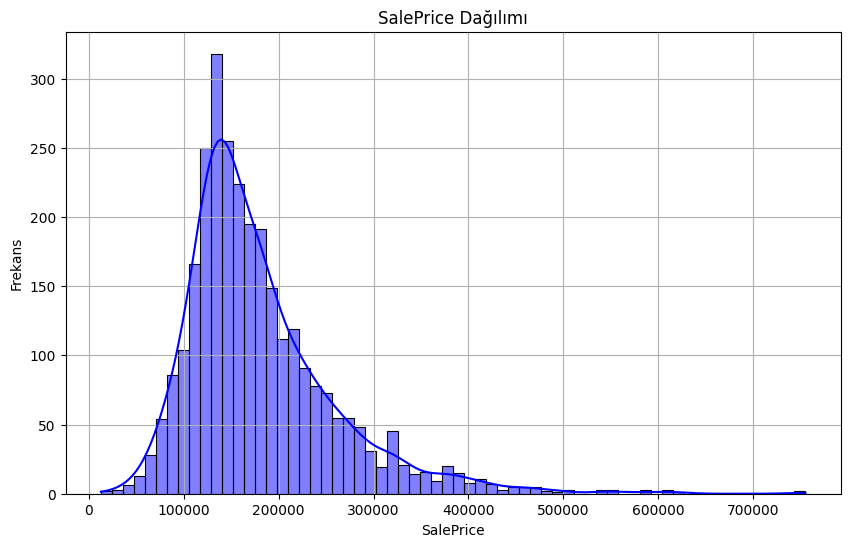

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue')
plt.title('SalePrice Dağılımı')
plt.xlabel('SalePrice')
plt.ylabel('Frekans')
plt.grid(True)

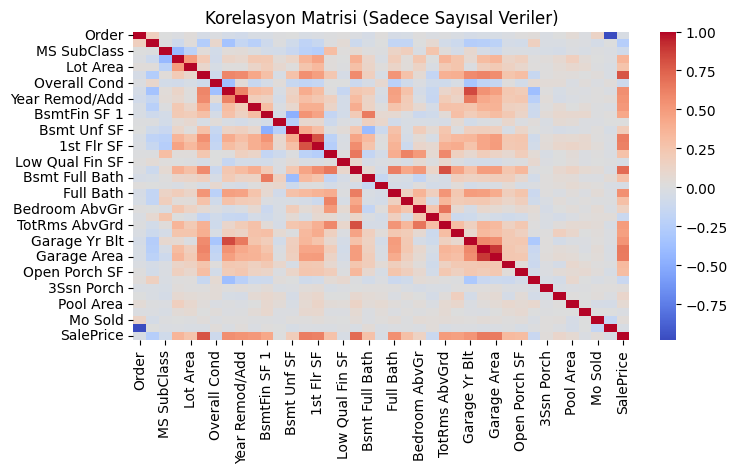

In [139]:
# Sadece sayısal sütunları seçelim (daha önce doğru yapıldığı gibi)
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Özellikler Arasındaki İlişkiler (Korelasyon Matrisi) - Sadece sayısal veriler
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Korelasyon Matrisi (Sadece Sayısal Veriler)')
plt.show()

In [140]:
# 5. Kategorik Değişkenlerin Analizi
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_counts = data[categorical_columns].nunique().sort_values()

missing_data, missing_percentage, desc, categorical_counts


(Pool QC           2917
 Misc Feature      2824
 Alley             2732
 Fence             2358
 Mas Vnr Type      1775
 Fireplace Qu      1422
 Lot Frontage       490
 Garage Cond        159
 Garage Qual        159
 Garage Finish      159
 Garage Yr Blt      159
 Garage Type        157
 Bsmt Exposure       83
 BsmtFin Type 2      81
 Bsmt Cond           80
 Bsmt Qual           80
 BsmtFin Type 1      80
 Mas Vnr Area        23
 Bsmt Half Bath       2
 Bsmt Full Bath       2
 BsmtFin SF 1         1
 Garage Cars          1
 Garage Area          1
 Total Bsmt SF        1
 Bsmt Unf SF          1
 BsmtFin SF 2         1
 Electrical           1
 dtype: int64,
 Pool QC           99.556314
 Misc Feature      96.382253
 Alley             93.242321
 Fence             80.477816
 Mas Vnr Type      60.580205
 Fireplace Qu      48.532423
 Lot Frontage      16.723549
 Garage Cond        5.426621
 Garage Qual        5.426621
 Garage Finish      5.426621
 Garage Yr Blt      5.426621
 Garage Type      

In [141]:
"""features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built']
X = data[features]
y = data['SalePrice']"""

features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', '1st Flr SF', 'Full Bath']
X = data[features]
y = data['SalePrice']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(max_depth=9, random_state=35)

model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=35)

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1674307793.7744274
R² Score: 0.7911695934713471


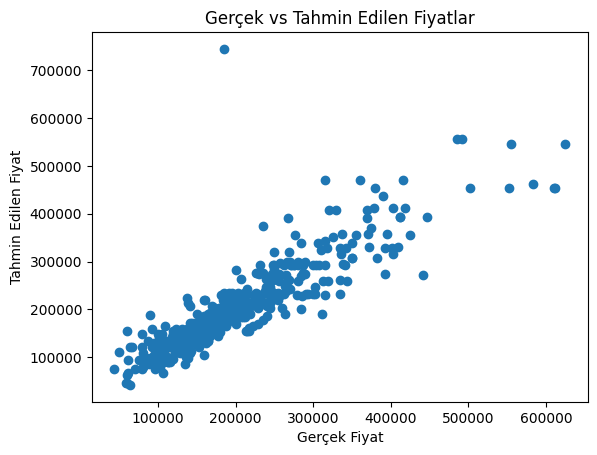

In [145]:
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.show()


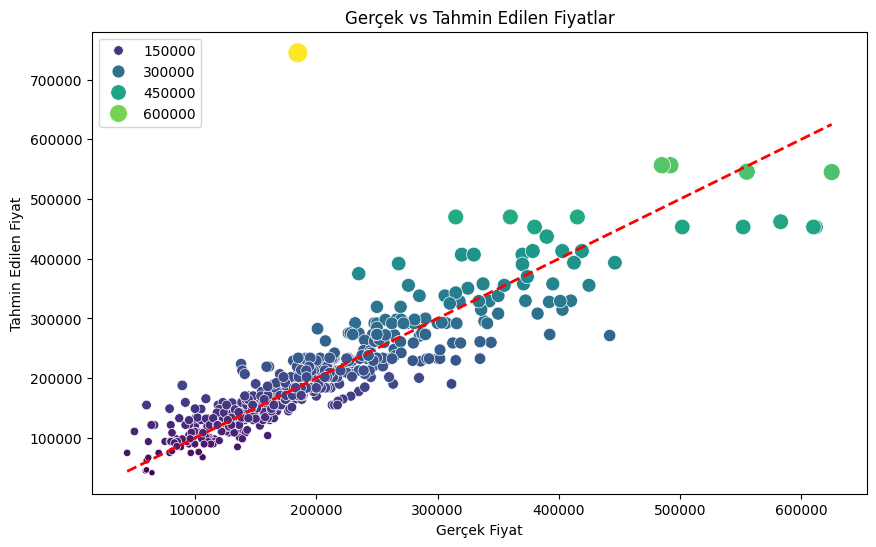

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_pred, palette='viridis', size=y_pred, sizes=(20, 200))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.show()